# Hudson Arney
## Data Science Lab 1 - Data Cleaning
### CSC 2621 121

### Dataset Description: 
The given data set is of addresses, and house specifications from Sacramento California. Each house has info on the number of types of rooms, square footage, price, sale date, exact location, etc. This can be better used to understand the housing market in Sacramento, and may be applied elsewhere.

### Introduction: 
In this lab, I will be working with a dataset containing real estate transactions in California from a programmer's standpoint. The tasks at hand include the initial steps of identifying, accessing, loading, and preparing the dataset for analysis. I also need to apply appropriate visual and statistical methods, using charts, to examine the distributions of individual variables.

During this process, I will ensure that data cleaning and transformation are carried out meticulously to maintain data integrity. In line with standard procedures, the results will be documented in a well-structured Jupyter notebook, featuring code segments and plotsI hope to bothto meet the technical requirements of thlabnby providingde clear explanations and interpretations of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.feather as feather

## 1. Loading the Data and Initial Assessment

### a.

In [2]:
# Specify the file path
file_path = "Sacramentorealestatetransactions.csv"

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)

### b. What are the variables? What are their inferred types? Do any of the columns have null values?
1. The variables included in the data are as follows:
   street (which is the address),
   city (in which the property is located),
   zip (zip code in which the property is located),
   state (in which the property is located),
   beds (# in the property),
   baths (# in the property),
   sq__ft (# included in the property),
   type (of property it is),
   sale_date,
   price,
   latitude, and
   longitude.
2. My inferred types are for these go as follows:
   street:     str 
   city:       str 
   zip:        int  
   state:      str 
   beds:       int  
   baths:      int  
   sq__ft:     int  
   type:       str 
   sale_date:  str 
   price:      int  
   latitude:   float
   longitude:  float
3. None of the columns have null values at all since they all have 985 non-null values (there are 985 values in total).

In [3]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


## 2. Representing Catergorical Data

### a.

In [5]:
# Count unique values for streets and zip codes
unique_streets = df['street'].nunique()
unique_zip_codes = df['zip'].nunique()

print(f"Unique Streets: {unique_streets}")
print(f"Unique Zip Codes: {unique_zip_codes}")

Unique Streets: 981
Unique Zip Codes: 68


In [6]:
# Count unique values for beds
unique_beds = df['beds'].nunique()
print(f"Unique Beds: {unique_beds}")

Unique Beds: 8


### b.

In [7]:
categorical_columns = ['city', 'state', 'zip', 'beds', 'baths', 'type']

# Convert specified columns to categorical
df[categorical_columns] = df[categorical_columns].astype('category')

## 3. Exploring Continuous Variables

### a.

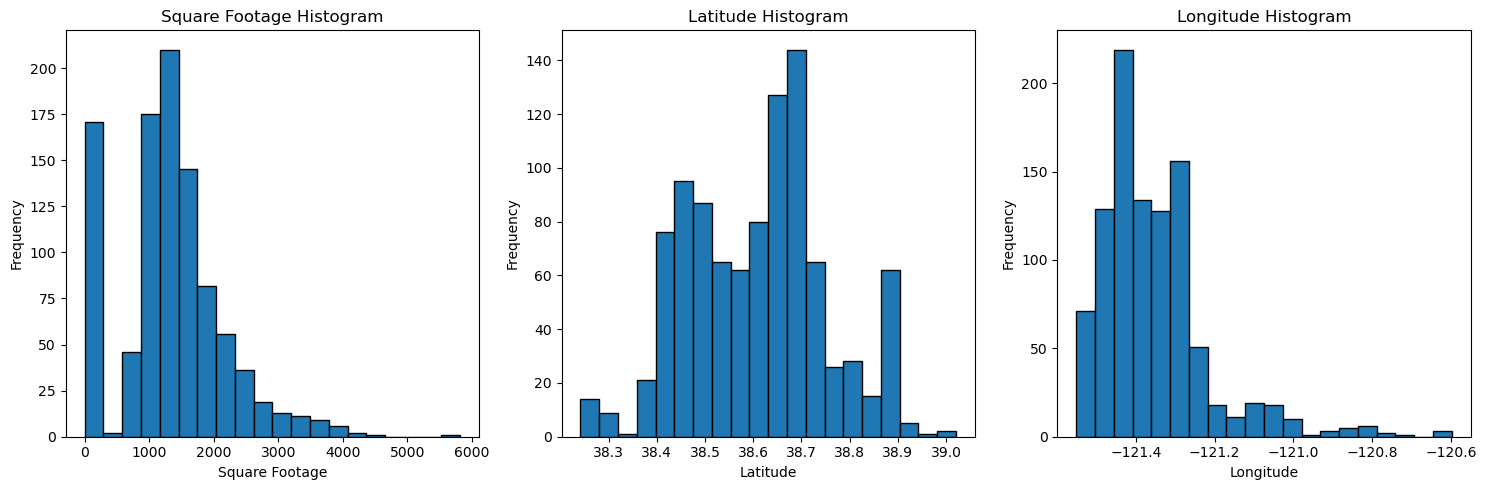

In [8]:
# subplots for histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# histogram for square footage
axes[0].hist(df['sq__ft'], bins=20, edgecolor='black')
axes[0].set_title('Square Footage Histogram')
axes[0].set_xlabel('Square Footage')
axes[0].set_ylabel('Frequency')

# histogram for latitudes
axes[1].hist(df['latitude'], bins=20, edgecolor='black')
axes[1].set_title('Latitude Histogram')
axes[1].set_xlabel('Latitude')
axes[1].set_ylabel('Frequency')

# histogram for longitudes
axes[2].hist(df['longitude'], bins=20, edgecolor='black')
axes[2].set_title('Longitude Histogram')
axes[2].set_xlabel('Longitude')
axes[2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### b. Do you notice “odd” patterns in any of the plots?

Yes I do, there are a large number of square footage places at 0. This could mean that they aren't actually house with an internal space, maybe like a  plot of land that a house could be built on.

As for the latitude and longitude, they are all within one degree on either side which seems accurate as all these properties are supposed to be within the same area of Sacramento California.

## 4. Exploring Categorical Variables

### a.

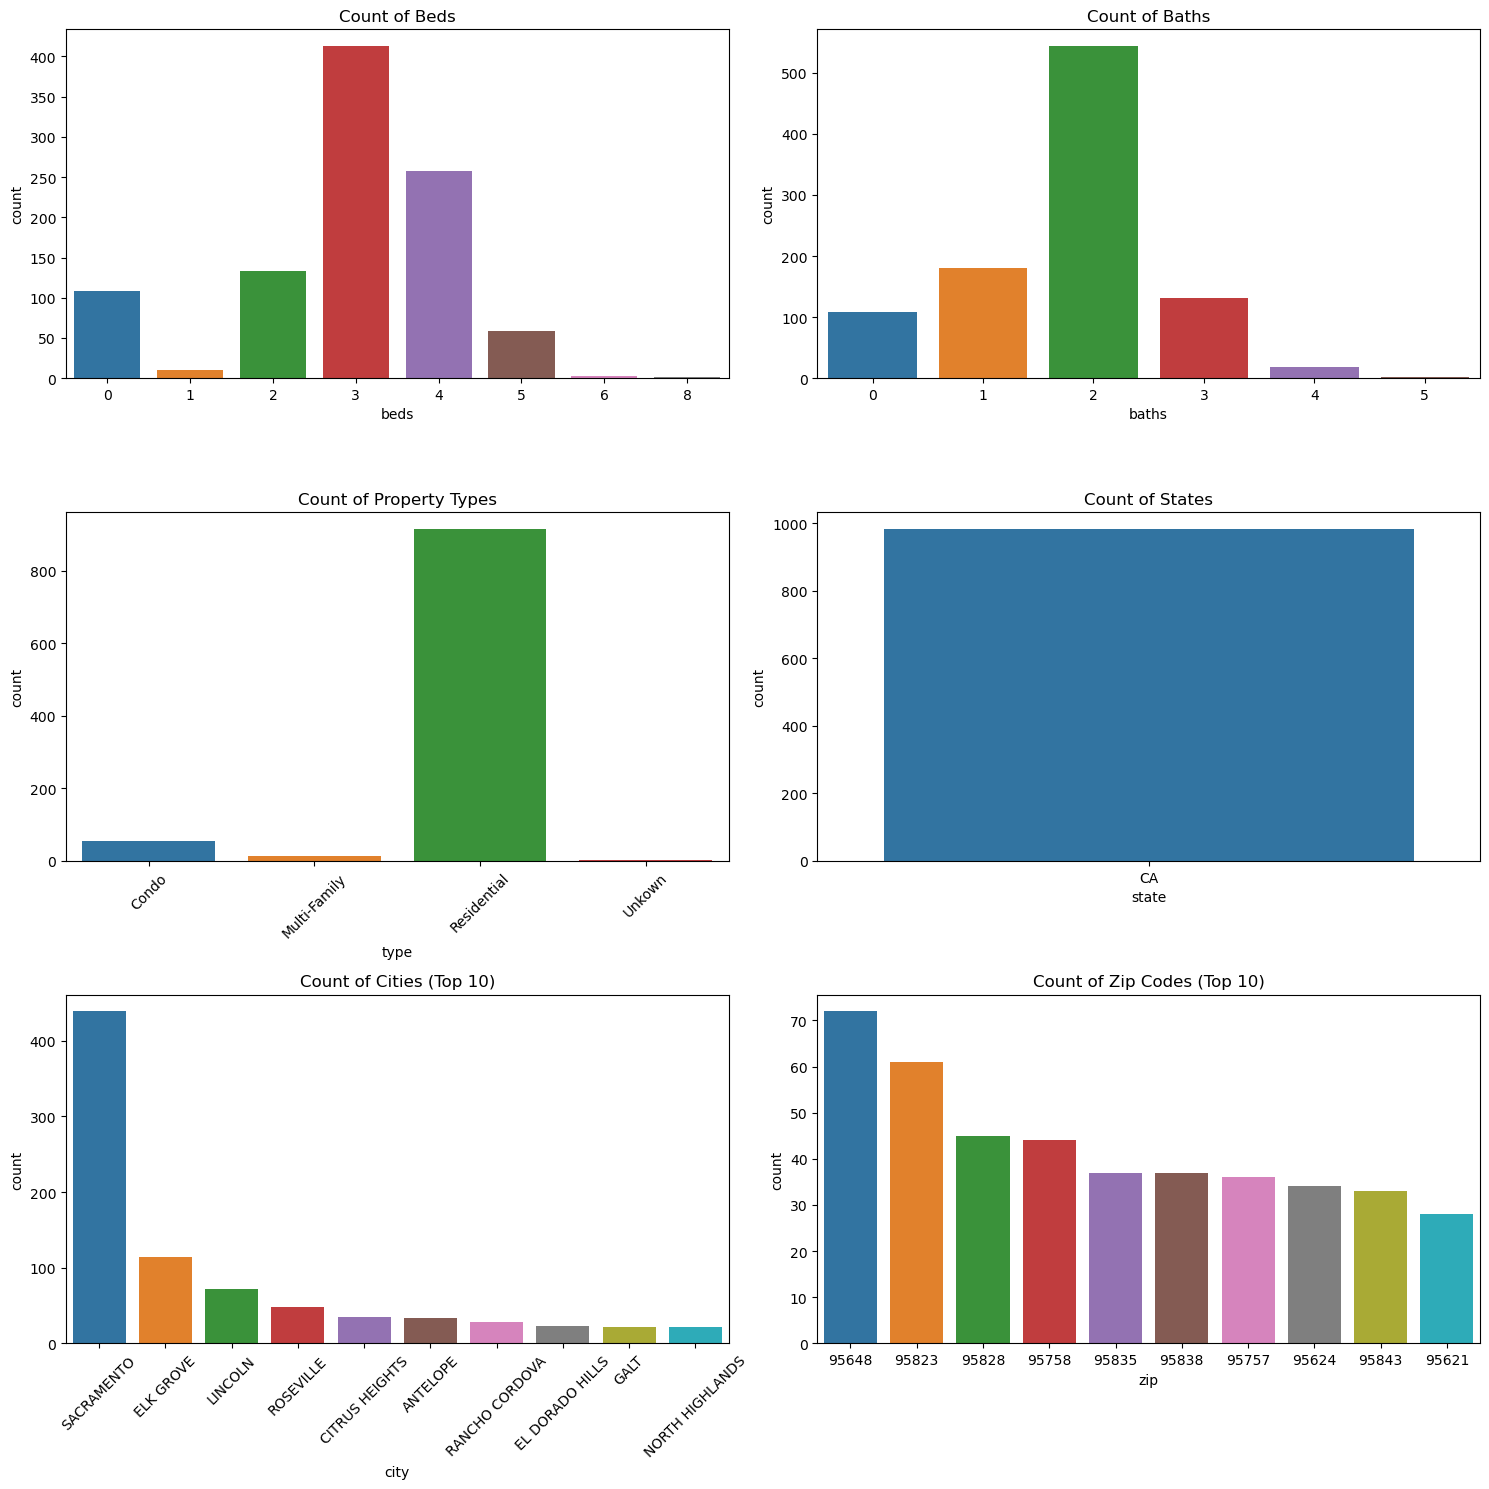

In [9]:
# subplots for count plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# beds count
sns.countplot(data=df, x='beds', ax=axes[0, 0])
axes[0, 0].set_title('Count of Beds')

# baths count
sns.countplot(data=df, x='baths', ax=axes[0, 1])
axes[0, 1].set_title('Count of Baths')

# type count
sns.countplot(data=df, x='type', ax=axes[1, 0])
axes[1, 0].set_title('Count of Property Types')
axes[1, 0].tick_params(axis='x', rotation=45)

# state count
sns.countplot(data=df, x='state', ax=axes[1, 1])
axes[1, 1].set_title('Count of States')

# city count
sns.countplot(data=df, x='city', ax=axes[2, 0], order=df['city'].value_counts().index[:10])
axes[2, 0].set_title('Count of Cities (Top 10)')
axes[2, 0].tick_params(axis='x', rotation=45)  

# zip count
sns.countplot(data=df, x='zip', ax=axes[2, 1], order=df['zip'].value_counts().index[:10])
axes[2, 1].set_title('Count of Zip Codes (Top 10)')
plt.tight_layout()
plt.show()

### b. Is there anything “odd” about the numbers of beds and baths?
Yes, there is about 100 of each that don't have a bed or bathroom, I believe this is probably similar to the empty property lots that we "discovered" from the 0 square footage histogram above. Other than that, all of the data comes from the state of California, most come from the city of Sacramento (I'm assuming the rest are neighboring cities or suburbs), the zip codes are all similar in number; all these points are expected. I personally find it odd that most common house would have 3 bedrooms and 2 bathrooms, maybe I'm just jealous being in a 4 bedroom apartment with only 1 bathroom.

## 5. Engineering New Variables Part 1

### a.

In [10]:
empty_lot = (df['sq__ft'] == 0)
print(f"Number of Empty Lots): {empty_lot.sum()}")

Number of Empty Lots): 171


### b.

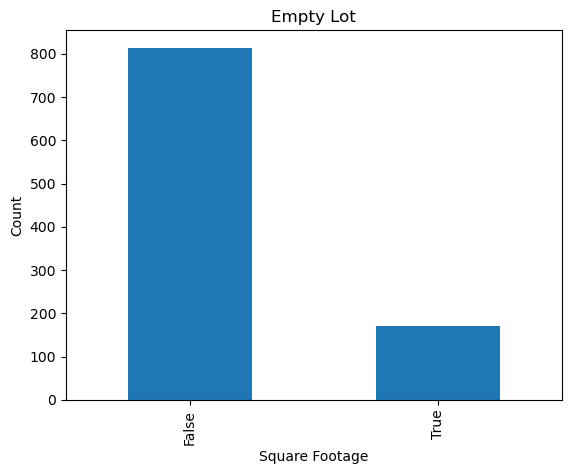

In [11]:
empty_lot.value_counts().plot(kind='bar')
plt.title('Empty Lot')
plt.xlabel('Square Footage')
plt.ylabel('Count')
plt.show()

## 6. Engineering New Variables Part 2

### a. 

In [12]:
unique_addresses = df['street'].nunique()
print(f"Number of Unique Addresses (Streets): {unique_addresses}")

Number of Unique Addresses (Streets): 981


### b. 

In [13]:
print(df['street'].head(20))

0                        3526 HIGH ST
1                         51 OMAHA CT
2                      2796 BRANCH ST
3                    2805 JANETTE WAY
4                     6001 MCMAHON DR
5                  5828 PEPPERMILL CT
6                 6048 OGDEN NASH WAY
7                       2561 19TH AVE
8     11150 TRINITY RIVER DR Unit 114
9                        7325 10TH ST
10                   645 MORRISON AVE
11                      4085 FAWN CIR
12                    2930 LA ROSA RD
13                      2113 KIRK WAY
14                4533 LOCH HAVEN WAY
15                     7340 HAMDEN PL
16                        6715 6TH ST
17            6236 LONGFORD DR Unit 1
18                    250 PERALTA AVE
19                    113 LEEWILL AVE
Name: street, dtype: object


### c. 

In [19]:
def get_street_type(address):
    words = address.split()
    
    street_types = ["STREET", "ST", "AVENUE", "AVE", "ROAD", "RD", "WAY", "DRIVE", "DR", "TRAK", "TRL"
                    "COURT", "CT", "PLACE", "PL", "PKWY", "LANE", "LN", "BOULEVARD", "BLVD", "CIRCLE", "CIR", "LOOP"]
    for word in words:
        if word.upper() in street_types:
            return word
    
    return "OTHER" # (TYPICALLY WITHOUT A STREET TYPE ATTACHED)

### d. 

In [20]:
df['street_type'] = df['street'].apply(get_street_type)

unique_street_types = df['street_type'].nunique()
print(f"Number of Unique Street Types: {unique_street_types}")

print(df['street_type'].unique())

Number of Unique Street Types: 15
['ST' 'CT' 'WAY' 'DR' 'AVE' 'CIR' 'RD' 'PL' 'LN' 'PKWY' 'BLVD' 'PLACE'
 'OTHER' 'LOOP' 'TRAK']


### e. 

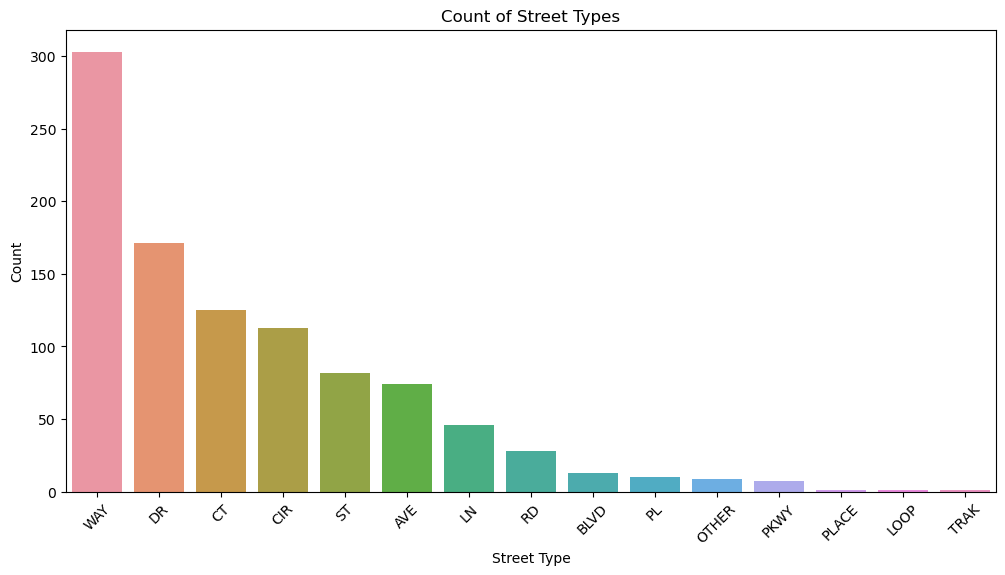

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='street_type', order=df['street_type'].value_counts().index)
plt.title('Count of Street Types')
plt.xlabel('Street Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 7. Identifying Potential Label Variables

### c. Identify a variable which would make a good label (output) variable for a regression problem.
I think price or square footage would be a good regression problem. These are the more numerical data type classifications from this set and I think they would be the easiest to comprehend in that way. This way you could use the price data to predict what the price of a house in a certain neighborhood would be based on other factors. You could also do price per square foot where you look at what is the "best deal on a property" per the square footage.

### d. Identify a variable which would make a good lar (output) variable for a classification problem
I think that the type of property given or the zip codes could be cool classification problems. Both serve to show what kind of environment the property is in. The type (which currently is Residental, Family, Condo) I think should add the empty lots as another option and this would give a better idea of what properties are available from the dataset. As for the zip codes I think that being able to see what parts of the city have certain houses, and the prices on houses in those certain zip codes would be interesting.

## 8. Identify and remove an outlier record from the dataset
From the graphs above there was a "Unknown" description under the type column. Upon analysis there is only one entry in this list, and I was able to remove it. No other unknown values are in the dataset.

In [17]:
df = df[df['type'].str.lower() != 'unkown']

unknown_count = (df['type'].str.lower() == 'unkown').sum()
print(f"Number of 'unknown' entries in 'type' column after removal: {unknown_count}")

Number of 'unknown' entries in 'type' column after removal: 0


## 9. Save the Cleaned Data Set

In [18]:
df.to_csv('cleaned_data.csv')

### Conclusion:
This lab enhanced my grasp of crucial data prep and analysis steps. It emphasized data cleaning's role in ensuring reliability and the application of apt statistical and visual methods to study variable distributions. This practical knowledge will benefit future analyses, emphasizing meticulous data handling and clear findings communication. 